# Order Delivery Time Prediction

## Objectives
The objective of this assignment is to build a regression model that predicts the delivery time for orders placed through Porter. The model will use various features such as the items ordered, the restaurant location, the order protocol, and the availability of delivery partners.

The key goals are:
- Predict the delivery time for an order based on multiple input features
- Improve delivery time predictions to optimiae operational efficiency
- Understand the key factors influencing delivery time to enhance the model's accuracy

## Data Pipeline
The data pipeline for this assignment will involve the following steps:
1. **Data Loading**
2. **Data Preprocessing and Feature Engineering**
3. **Exploratory Data Analysis**
4. **Model Building**
5. **Model Inference**

## Data Understanding
The dataset contains information on orders placed through Porter, with the following columns:

| Field                     | Description                                                                                 |
|---------------------------|---------------------------------------------------------------------------------------------|
| market_id                 | Integer ID representing the market where the restaurant is located.                         |
| created_at                | Timestamp when the order was placed.                                                        |
| actual_delivery_time      | Timestamp when the order was delivered.                                                     |
| store_primary_category    | Category of the restaurant (e.g., fast food, dine-in).                                      |
| order_protocol            | Integer representing how the order was placed (e.g., via Porter, call to restaurant, etc.). |
| total_items               | Total number of items in the order.                                                         |
| subtotal                  | Final price of the order.                                                                   |
| num_distinct_items        | Number of distinct items in the order.                                                      |
| min_item_price            | Price of the cheapest item in the order.                                                    |
| max_item_price            | Price of the most expensive item in the order.                                              |
| total_onshift_dashers     | Number of delivery partners on duty when the order was placed.                              |
| total_busy_dashers        | Number of delivery partners already occupied with other orders.                             |
| total_outstanding_orders  | Number of orders pending fulfillment at the time of the order.                              |
| distance                  | Total distance from the restaurant to the customer.                                         |


## **Importing Necessary Libraries**

In [21]:
# Import essential libraries for data manipulation and analysis
import pandas as pd
import numpy as np



## **1. Loading the data**
Load 'porter_data_1.csv' as a DataFrame

In [23]:
# Importing the file porter_data_1.csv
df = pd.read_csv('porter_data_1.csv')
print(df)

        market_id           created_at actual_delivery_time  \
0             1.0  2015-02-06 22:24:17  2015-02-06 23:11:17   
1             2.0  2015-02-10 21:49:25  2015-02-10 22:33:25   
2             2.0  2015-02-16 00:11:35  2015-02-16 01:06:35   
3             1.0  2015-02-12 03:36:46  2015-02-12 04:35:46   
4             1.0  2015-01-27 02:12:36  2015-01-27 02:58:36   
...           ...                  ...                  ...   
175772        1.0  2015-02-17 00:19:41  2015-02-17 01:02:41   
175773        1.0  2015-02-13 00:01:59  2015-02-13 01:03:59   
175774        1.0  2015-01-24 04:46:08  2015-01-24 05:32:08   
175775        1.0  2015-02-01 18:18:15  2015-02-01 19:03:15   
175776        1.0  2015-02-08 19:24:33  2015-02-08 20:01:33   

        store_primary_category  order_protocol  total_items  subtotal  \
0                            4             1.0            4      3441   
1                           46             2.0            1      1900   
2                       

## **2. Data Preprocessing and Feature Engineering** <font color = red>[15 marks]</font> <br>

#### **2.1 Fixing the Datatypes**  <font color = red>[5 marks]</font> <br>
The current timestamps are in object format and need conversion to datetime format for easier handling and intended functionality

##### **2.1.1** <font color = red>[2 marks]</font> <br>
Convert date and time fields to appropriate data type

In [24]:
# Convert 'created_at' and 'actual_delivery_time' columns to datetime format
df['created_at'] = pd.to_datetime(df['created_at'])
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'])


##### **2.1.2**  <font color = red>[3 marks]</font> <br>
Convert categorical fields to appropriate data type

In [25]:
# Convert categorical features to category type
# Identify categorical columns (you may need to adjust this based on your data understanding)
categorical_cols = ['market_id', 'store_primary_category', 'order_protocol']

# Convert categorical features to category type
for col in categorical_cols:
    df[col] = df[col].astype('category')

# Verify the data types
print(df.dtypes)


market_id                         category
created_at                  datetime64[ns]
actual_delivery_time        datetime64[ns]
store_primary_category            category
order_protocol                    category
total_items                          int64
subtotal                             int64
num_distinct_items                   int64
min_item_price                       int64
max_item_price                       int64
total_onshift_dashers              float64
total_busy_dashers                 float64
total_outstanding_orders           float64
distance                           float64
dtype: object


#### **2.2 Feature Engineering** <font color = red>[5 marks]</font> <br>
Calculate the time taken to execute the delivery as well as extract the hour and day at which the order was placed

##### **2.2.1** <font color = red>[2 marks]</font> <br>
Calculate the time taken using the features `actual_delivery_time` and `created_at`

In [26]:
# Calculate time taken in minutes
df['delivery_time_minutes'] = (df['actual_delivery_time'] - df['created_at']).dt.total_seconds() / 60

##### **2.2.2** <font color = red>[3 marks]</font> <br>
Extract the hour at which the order was placed and which day of the week it was. Drop the unnecessary columns.

In [ ]:
# Extract the hour and day of week from the 'created_at' timestamp
df['order_hour'] = df['created_at'].dt.hour
df['day_of_week'] = df['created_at'].dt.dayofweek

# Create a categorical feature 'isWeekend'
df['isWeekend'] = df['day_of_week'].isin([5, 6]).astype(int)


In [ ]:
# Drop unnecessary columns
df.drop(['created_at', 'actual_delivery_time'], axis=1, inplace=True)


#### **2.3 Creating training and validation sets** <font color = red>[5 marks]</font> <br>

##### **2.3.1** <font color = red>[2 marks]</font> <br>
 Define target and input features

In [28]:
# Define target variable (y) and features (X)
X = df.drop('delivery_time_minutes', axis=1)  
y = df['delivery_time_minutes']  


##### **2.3.2** <font color = red>[3 marks]</font> <br>
 Split the data into training and test sets

In [29]:
# Split data into training and testing sets
from sklearn.model_selection import train_test_split

# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print shapes to verify
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (140621, 14)
Testing set shape: (35156, 14)


## **3. Exploratory Data Analysis on Training Data** <font color = red>[20 marks]</font> <br>
1. Analyzing the correlation between variables to identify patterns and relationships
2. Identifying and addressing outliers to ensure the integrity of the analysis
3. Exploring the relationships between variables and examining the distribution of the data for better insights

#### **3.1 Feature Distributions** <font color = red> [7 marks]</font> <br>


In [30]:
# Define numerical and categorical columns for easy EDA and data manipulation
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns


##### **3.1.1** <font color = red>[3 marks]</font> <br>
Plot distributions for numerical columns in the training set to understand their spread and any skewness

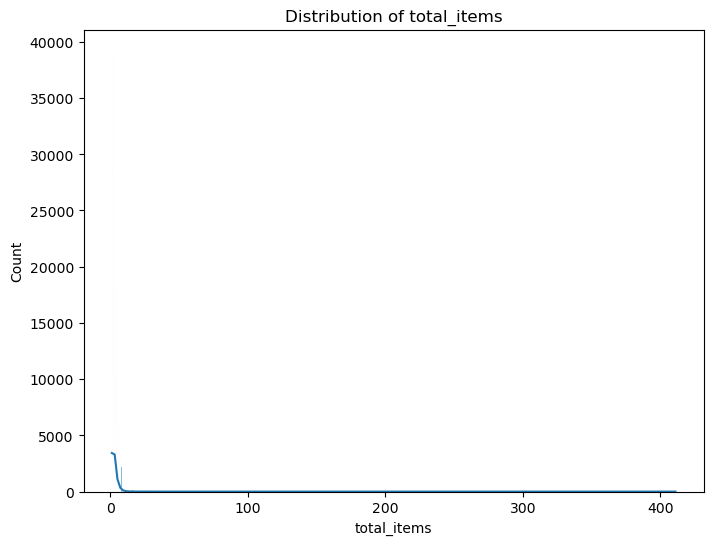

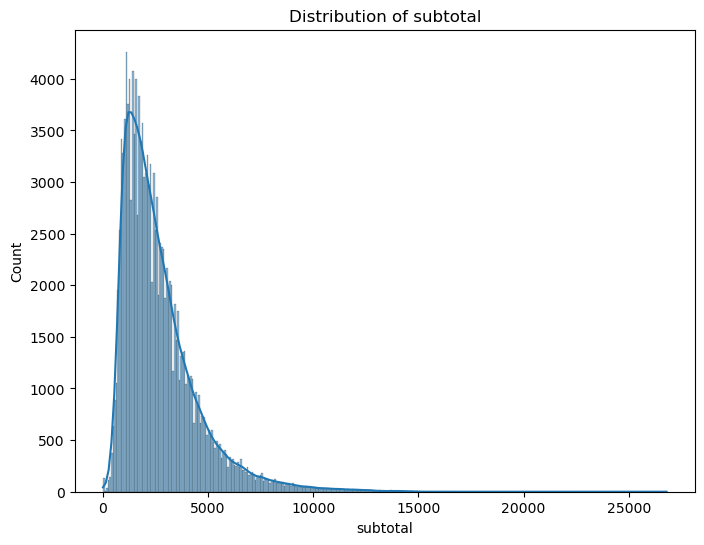

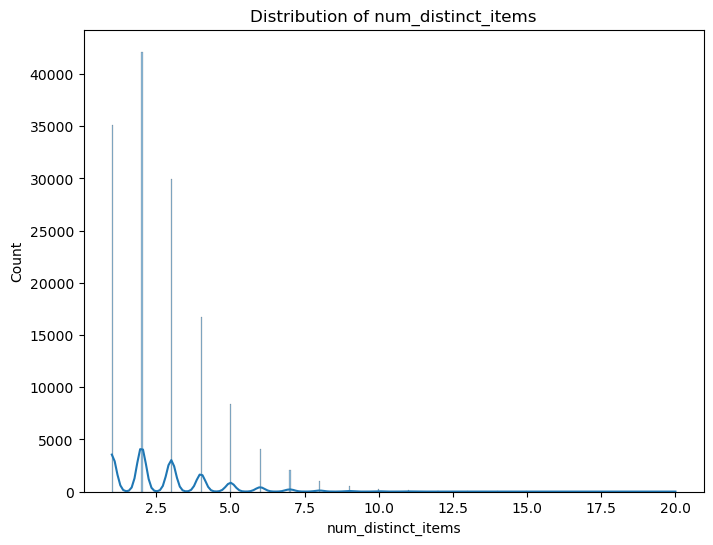

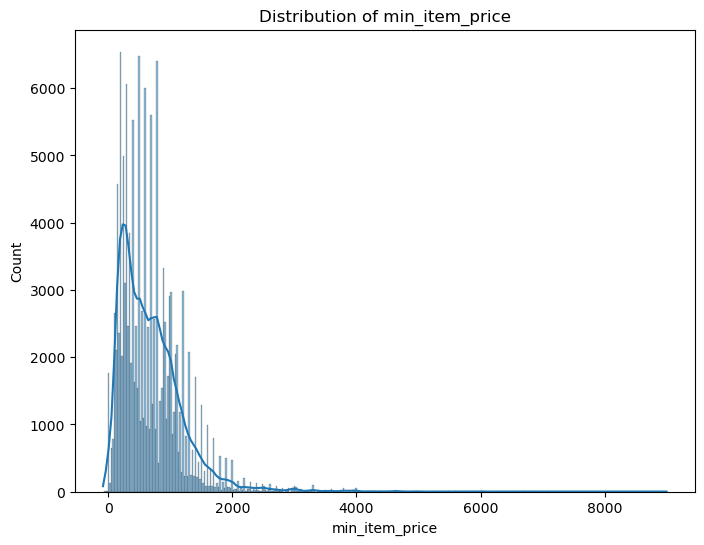

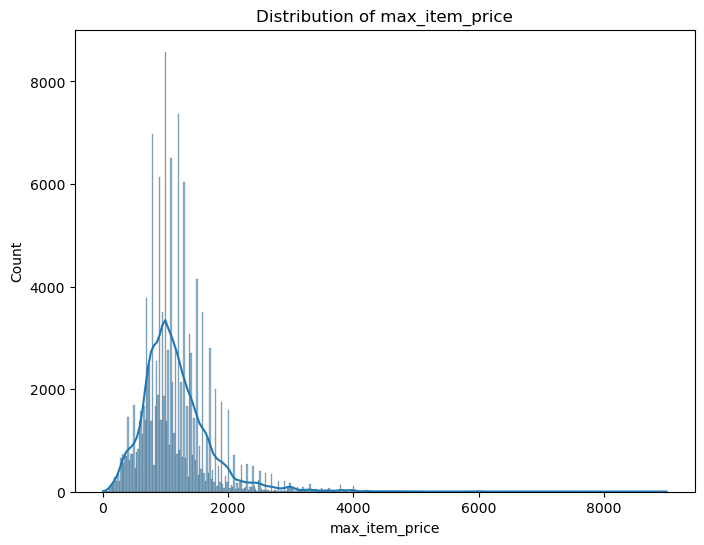

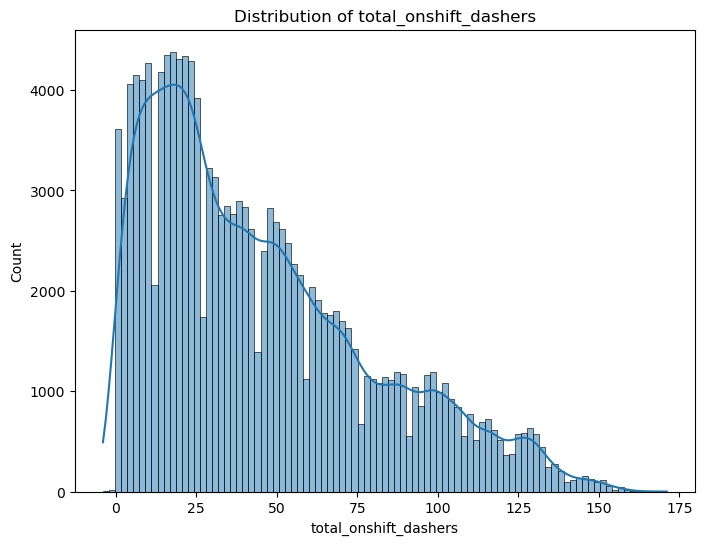

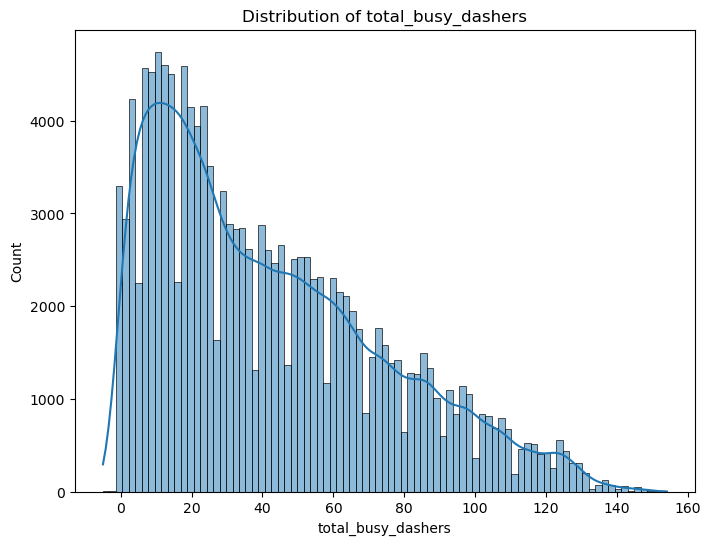

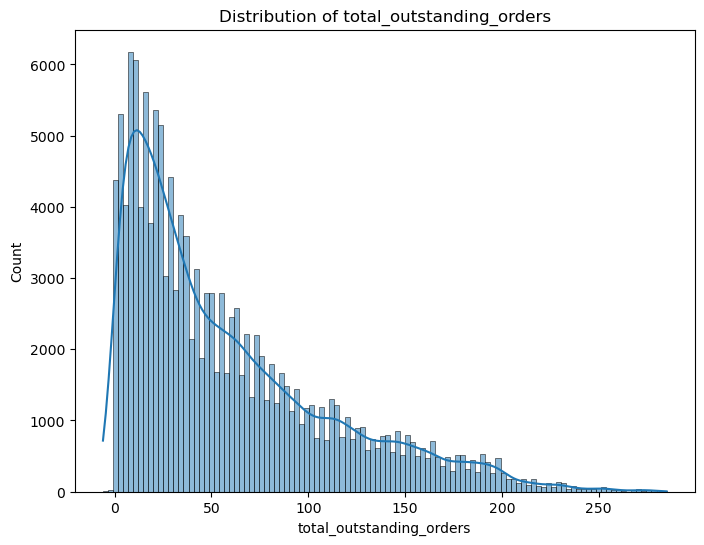

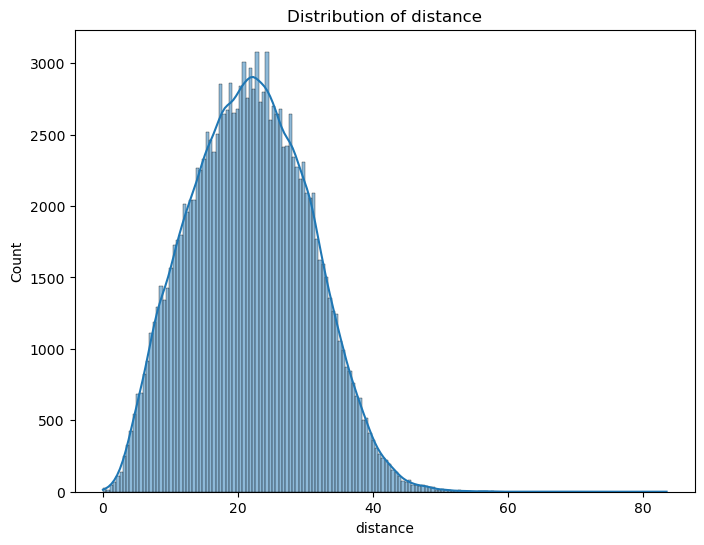

In [34]:
# Plot distributions for all numerical columns
for col in numerical_cols:
    plt.figure(figsize=(8,6))
    sns.histplot(X_train[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

##### **3.1.2** <font color = red>[2 marks]</font> <br>
Check the distribution of categorical features

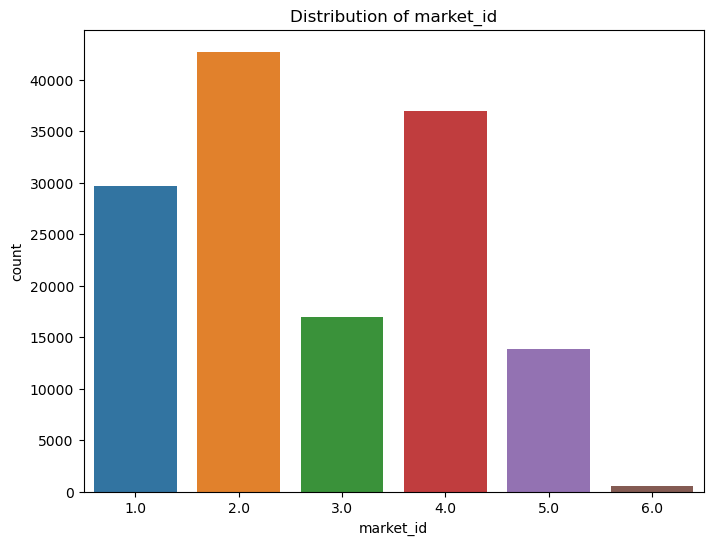

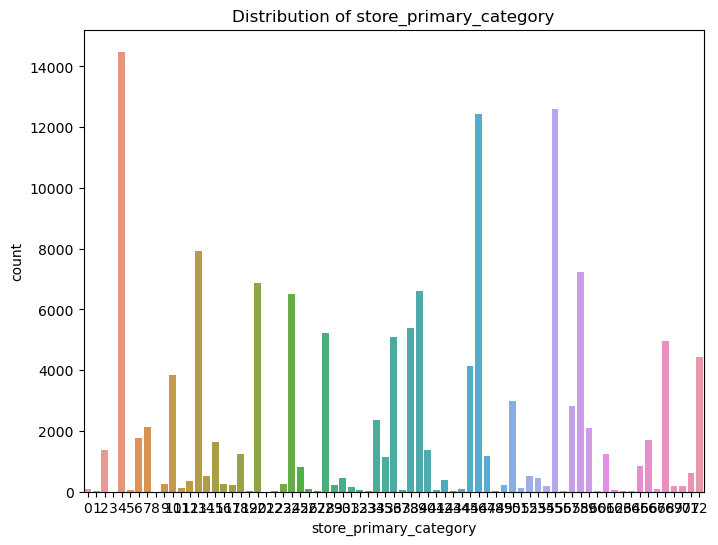

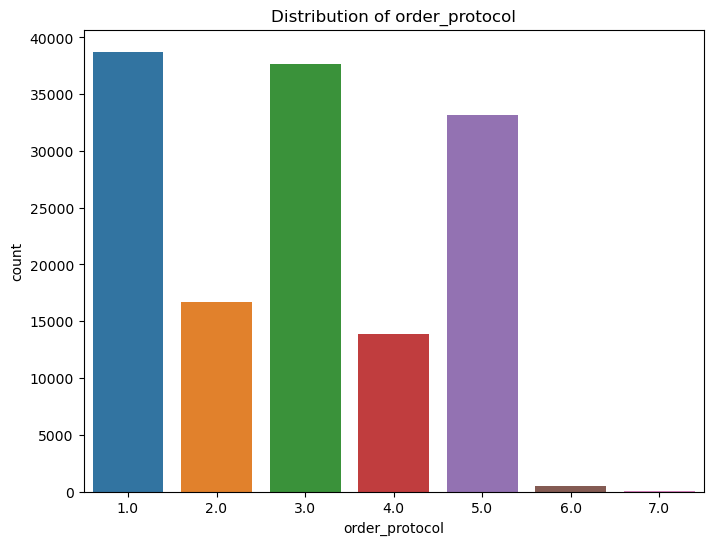

In [35]:
# Distribution of categorical columns
categorical_cols = X_train.select_dtypes(include=['category']).columns
for col in categorical_cols:
    plt.figure(figsize=(8,6))
    sns.countplot(x=X_train[col])
    plt.title(f'Distribution of {col}')
    plt.show()



##### **3.1.3** <font color = red>[2 mark]</font> <br>
Visualise the distribution of the target variable to understand its spread and any skewness

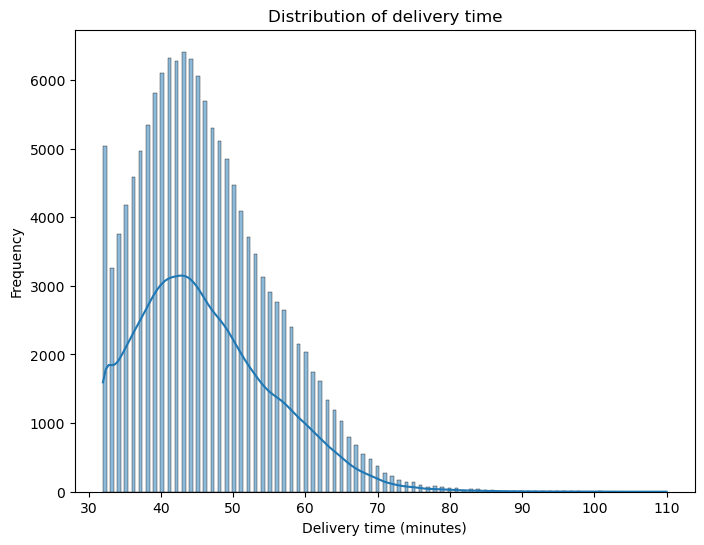

In [36]:
# Distribution of time_taken
plt.figure(figsize=(8,6))
sns.histplot(y_train, kde=True)
plt.title('Distribution of delivery time')
plt.xlabel('Delivery time (minutes)')
plt.ylabel('Frequency')
plt.show()


#### **3.2 Relationships Between Features** <font color = red>[3 marks]</font> <br>

##### **3.2.1** <font color = red>[3 marks]</font> <br>
Scatter plots for important numerical and categorical features to observe how they relate to `time_taken`

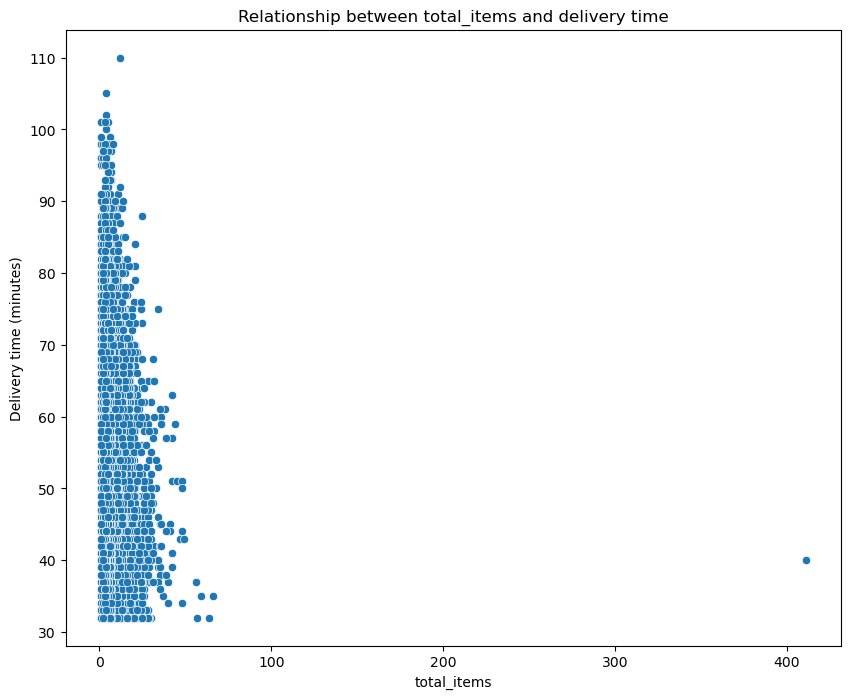

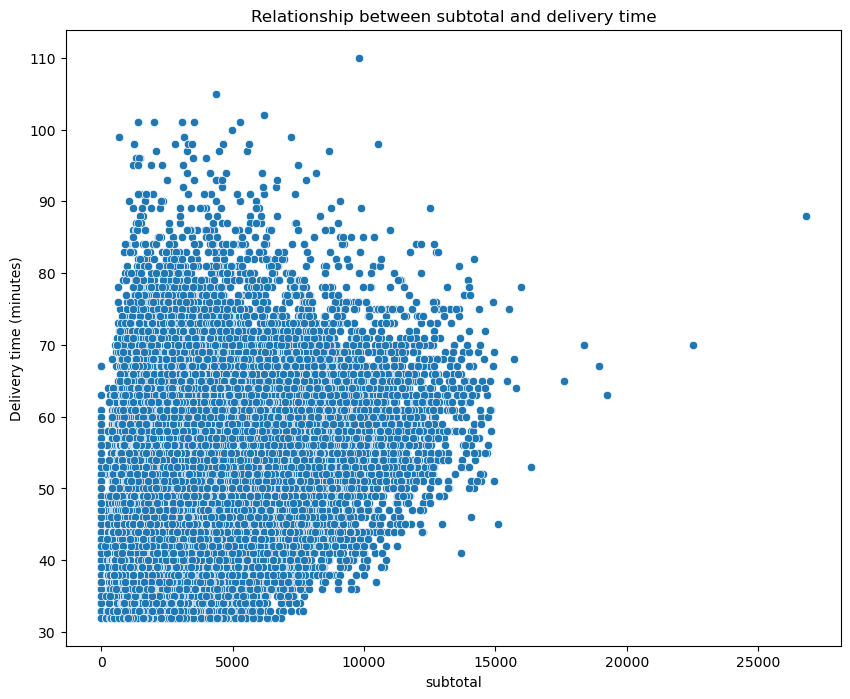

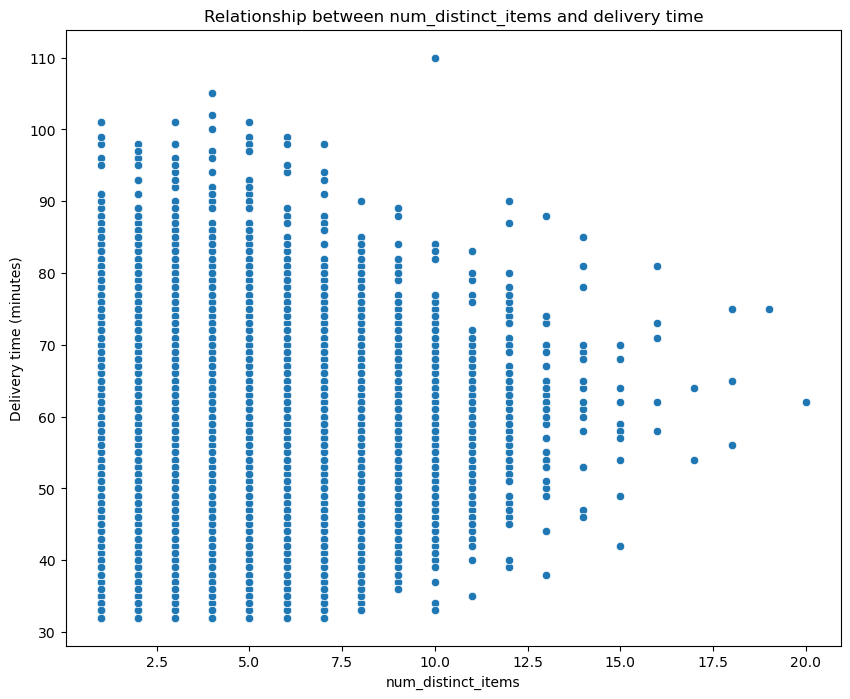

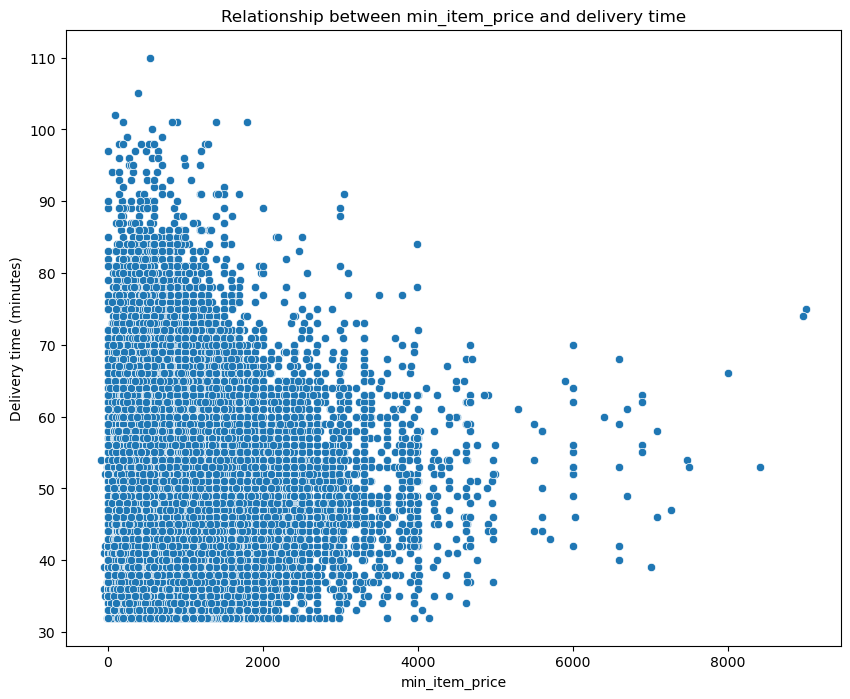

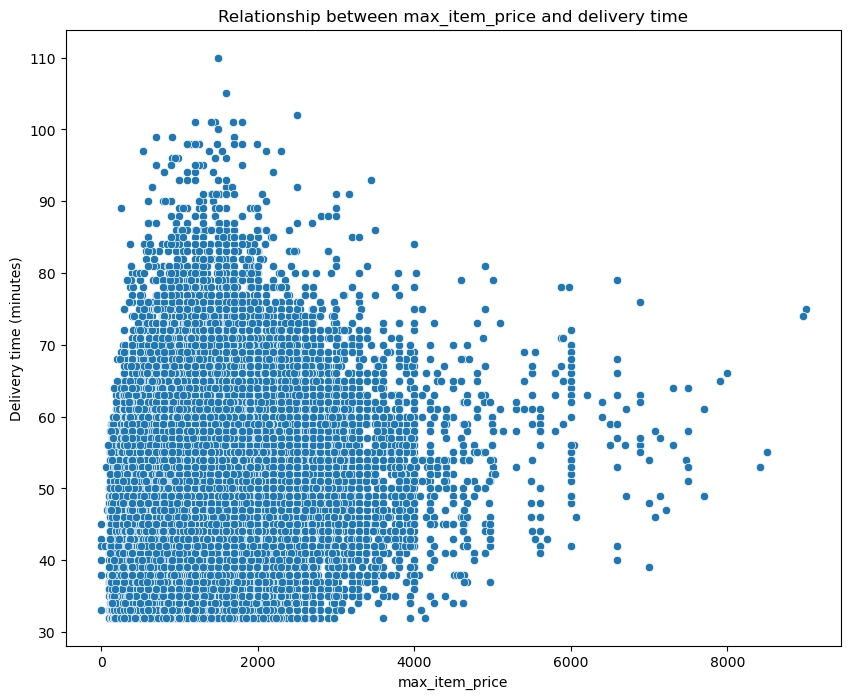

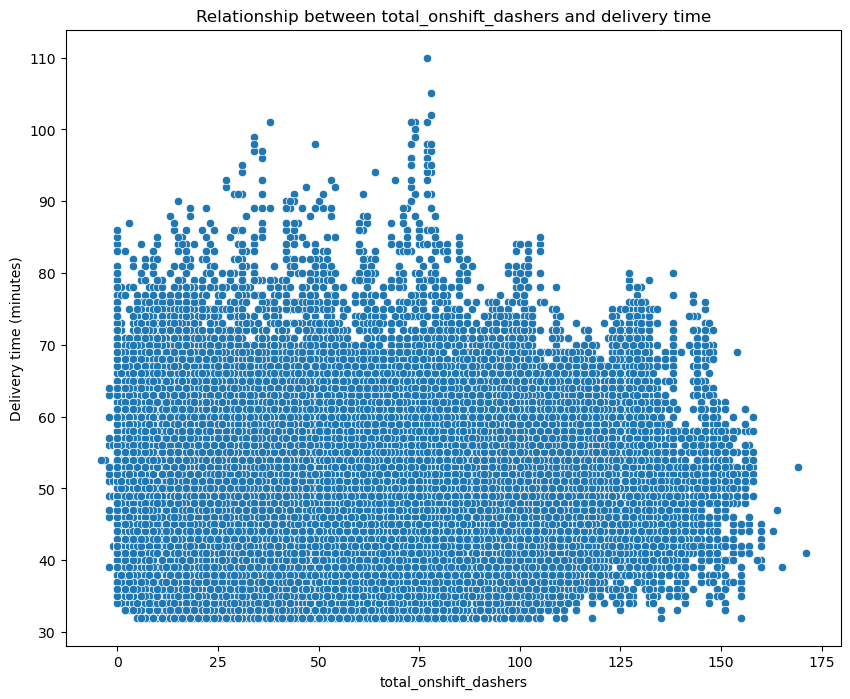

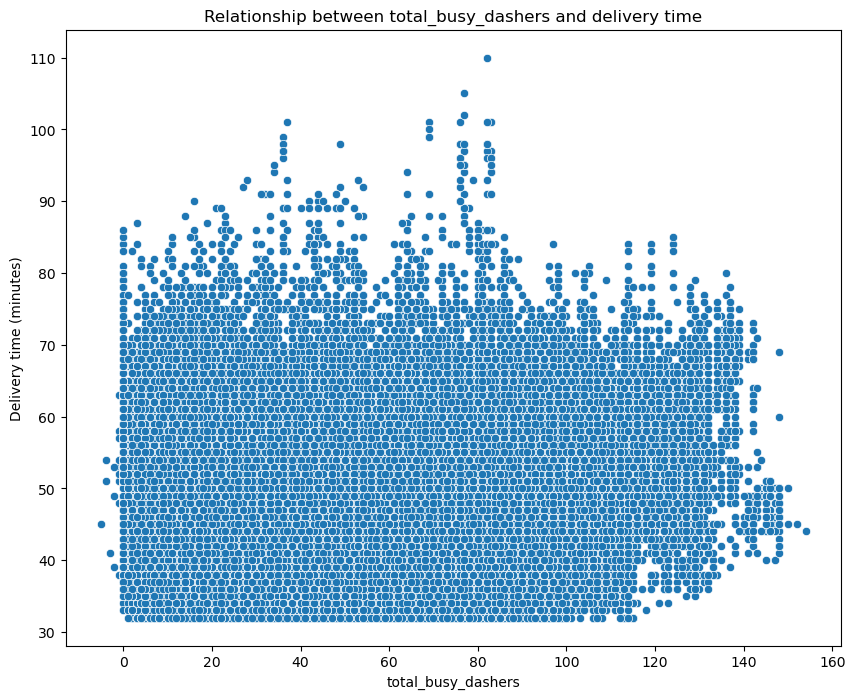

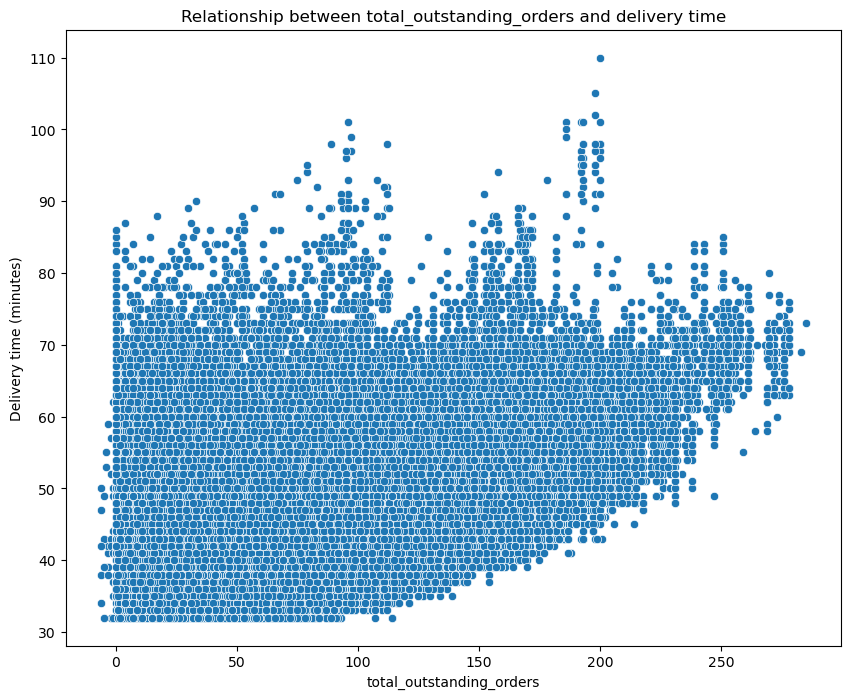

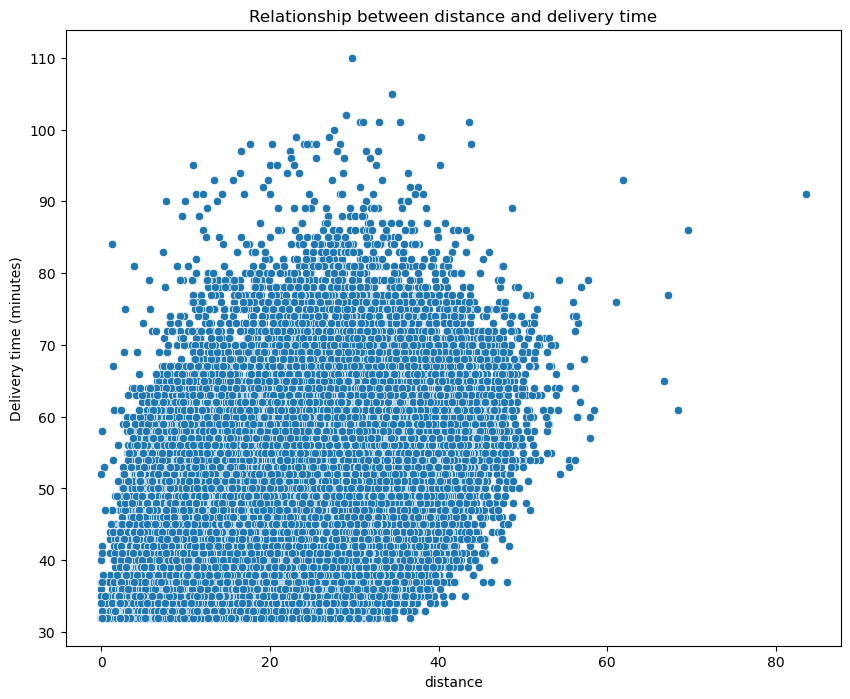

In [37]:
# Scatter plot to visualise the relationship between time_taken and other features
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_cols:
    plt.figure(figsize=(10,8))
    sns.scatterplot(x=X_train[col], y=y_train)
    plt.title(f'Relationship between {col} and delivery time')
    plt.xlabel(col)
    plt.ylabel('Delivery time (minutes)')
    plt.show()



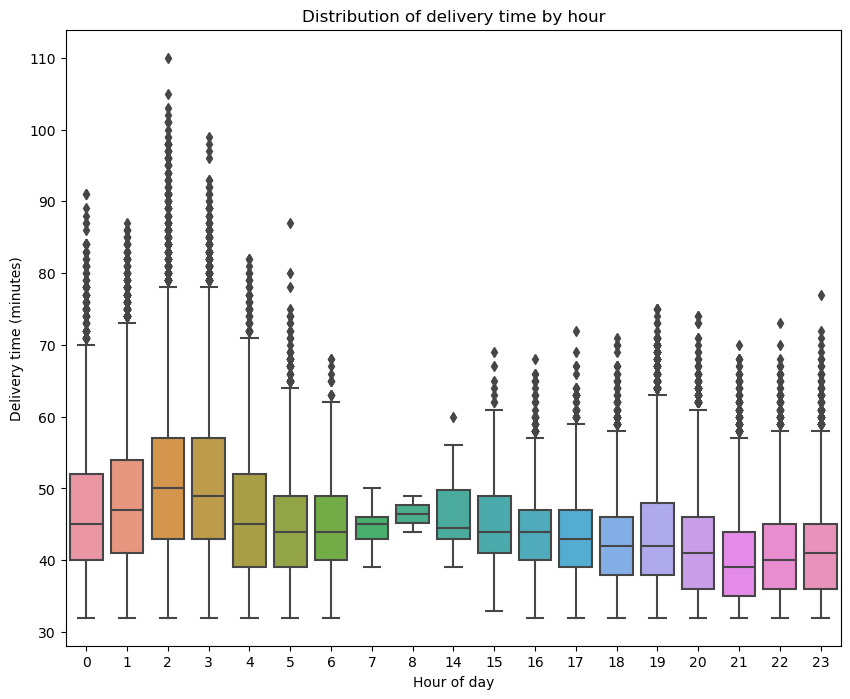

In [39]:
# Create order_hour column
df['order_hour'] = pd.to_datetime(df['created_at']).dt.hour

# Show the distribution of delivery time for different hours
plt.figure(figsize=(10,8))
sns.boxplot(x=df['order_hour'], y=df['delivery_time_minutes'])
plt.title('Distribution of delivery time by hour')
plt.xlabel('Hour of day')
plt.ylabel('Delivery time (minutes)')
plt.show()


#### **3.3 Correlation Analysis** <font color = red>[5 marks]</font> <br>
Check correlations between numerical features to identify which variables are strongly related to `time_taken`

##### **3.3.1** <font color = red>[3 marks]</font> <br>
Plot a heatmap to display correlations

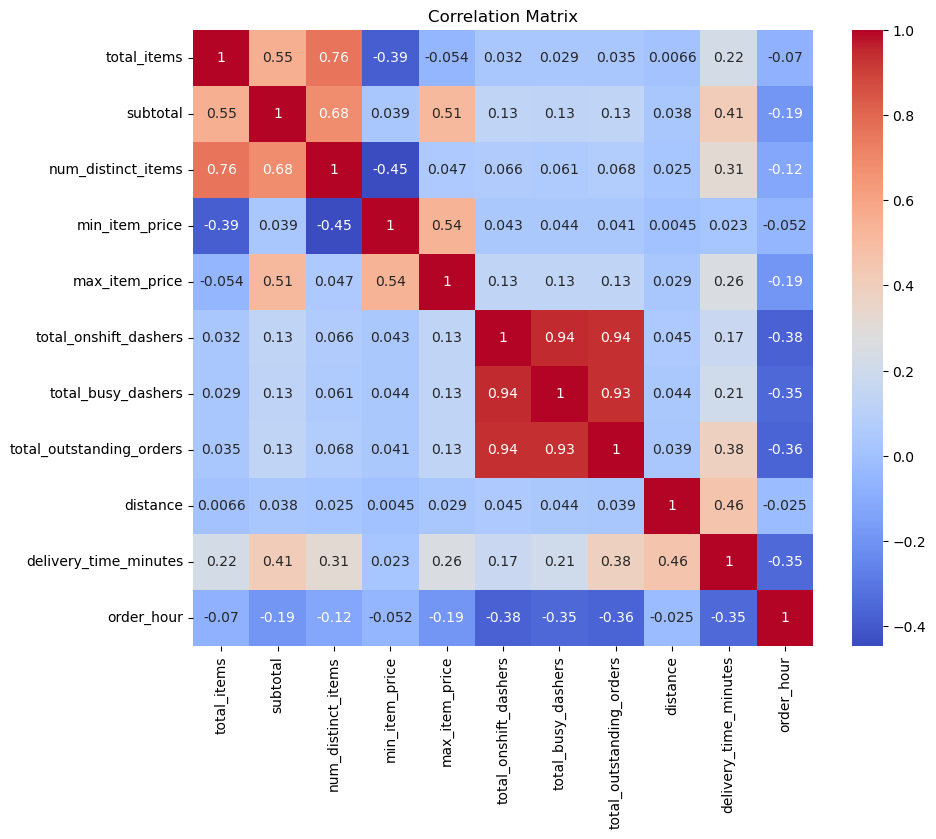

In [40]:
# Plot the heatmap of the correlation matrix
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
corr_matrix = df[numerical_cols].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


##### **3.3.2** <font color = red>[2 marks]</font> <br>
Drop the columns with weak correlations with the target variable

In [41]:
# Drop 3-5 weakly correlated columns from training dataset
highly_correlated_features = []
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.7:
            highly_correlated_features.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))
print('Highly correlated features:')
for feature in highly_correlated_features:
    print(feature)



Highly correlated features:
('num_distinct_items', 'total_items', 0.7583387444005014)
('total_busy_dashers', 'total_onshift_dashers', 0.9437245736591529)
('total_outstanding_orders', 'total_onshift_dashers', 0.9361212944371059)
('total_outstanding_orders', 'total_busy_dashers', 0.9328264016734774)


#### **3.4 Handling the Outliers** <font color = red>[5 marks]</font> <br>



##### **3.4.1** <font color = red>[2 marks]</font> <br>
Visualise potential outliers for the target variable and other numerical features using boxplots

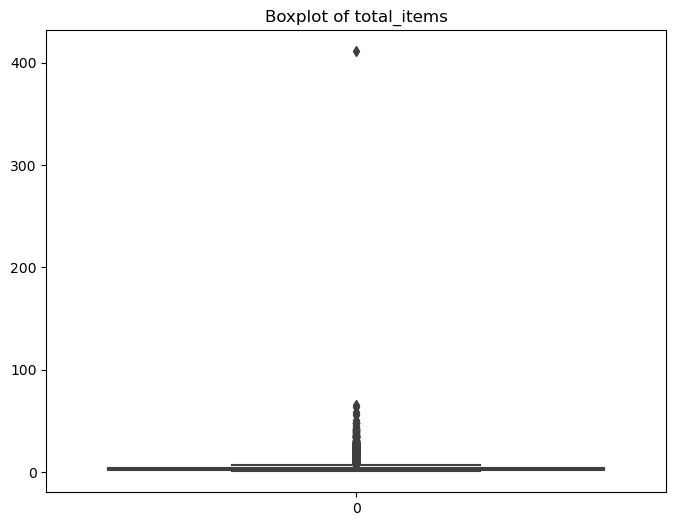

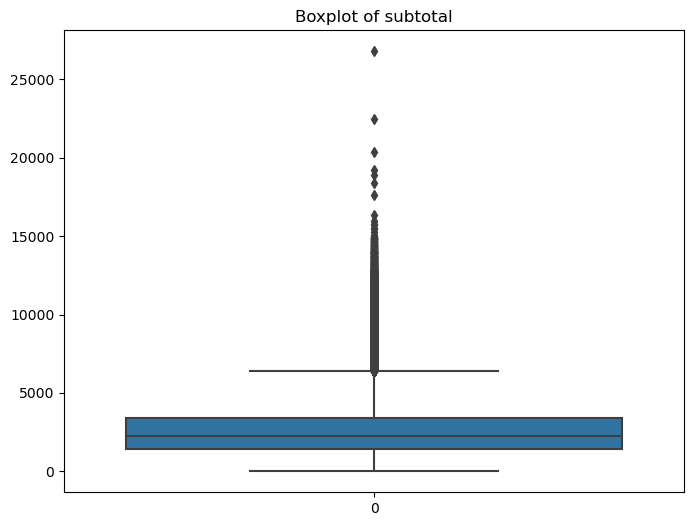

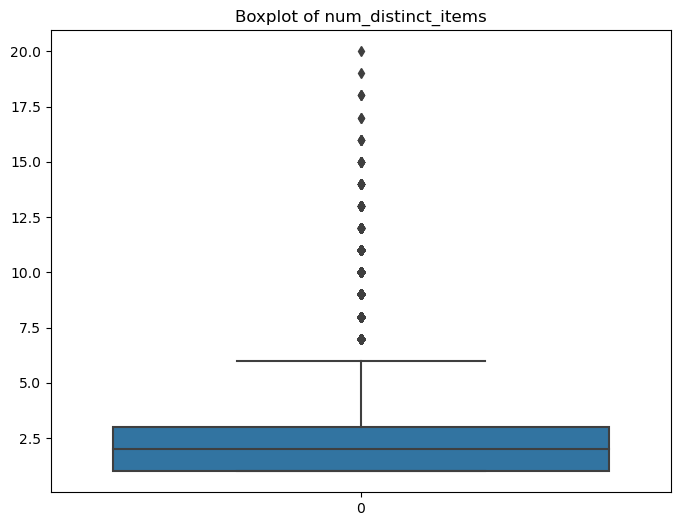

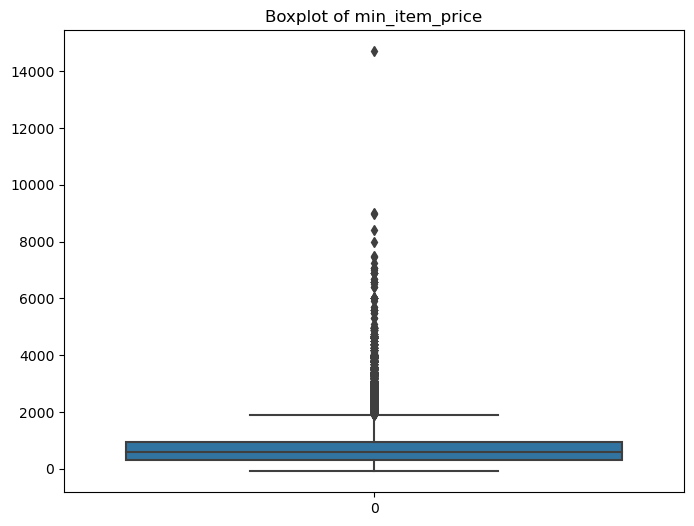

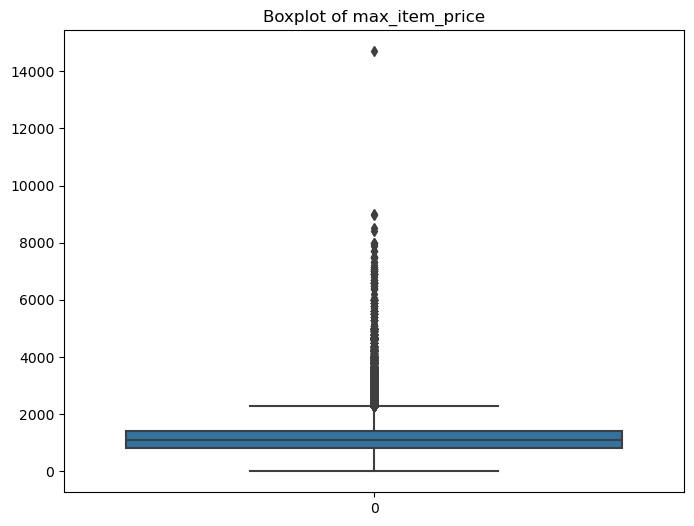

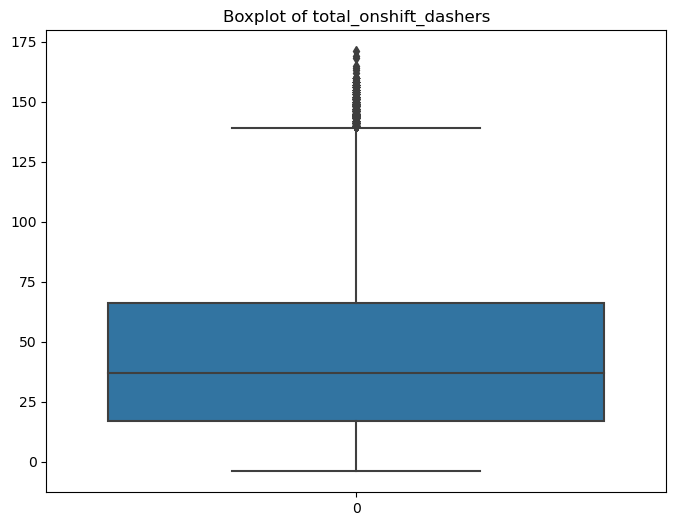

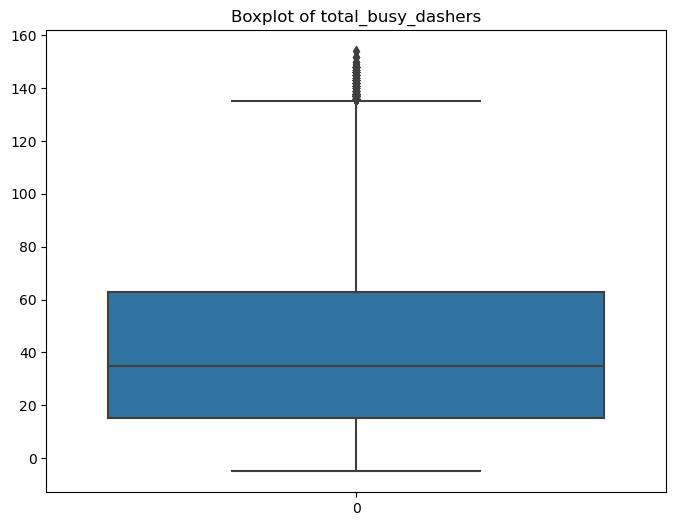

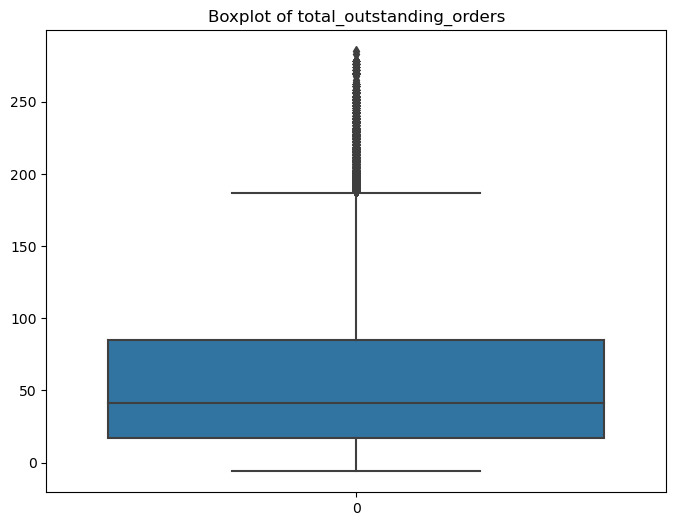

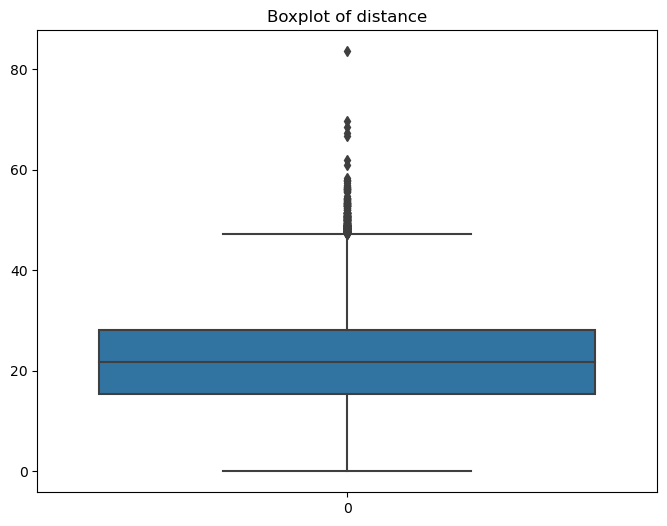

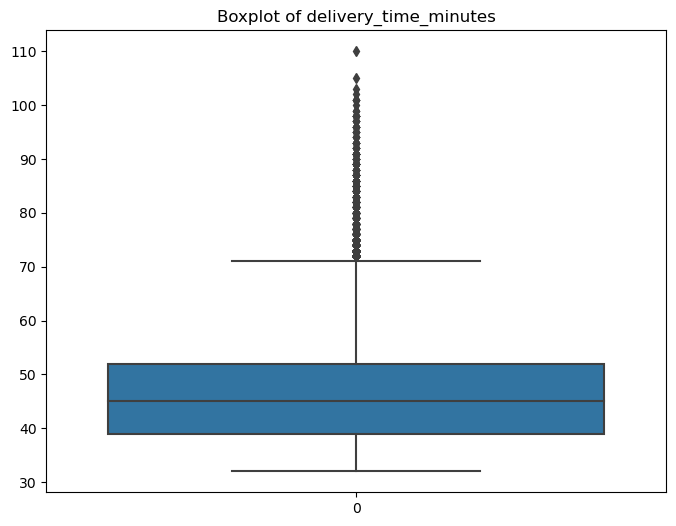

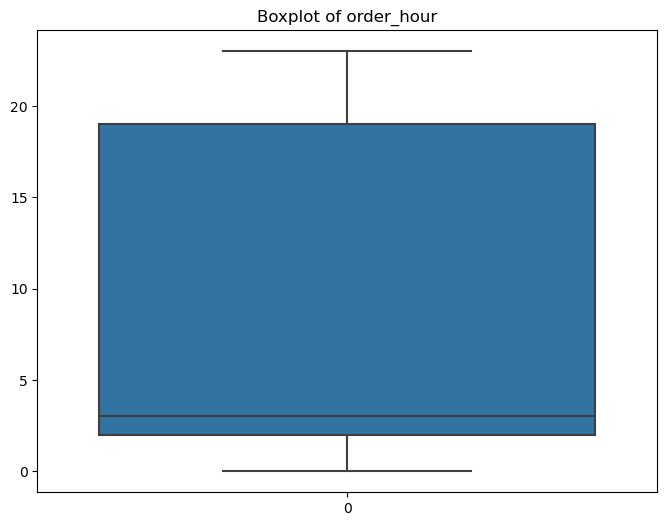

In [42]:
# Boxplot for time_taken
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_cols:
    plt.figure(figsize=(8,6))
    sns.boxplot(df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()



##### **3.4.2** <font color = red>[3 marks]</font> <br>
Handle outliers present in all columns

In [43]:
# Handle outliers
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])




## **4. Exploratory Data Analysis on Validation Data** <font color = red>[optional]</font> <br>
Optionally, perform EDA on test data to see if the distribution match with the training data

In [ ]:
# Define numerical and categorical columns for easy EDA and data manipulation



#### **4.1 Feature Distributions**


##### **4.1.1**
Plot distributions for numerical columns in the validation set to understand their spread and any skewness

In [ ]:
# Plot distributions for all numerical columns



##### **4.1.2**
Check the distribution of categorical features

In [ ]:
# Distribution of categorical columns



##### **4.1.3**
Visualise the distribution of the target variable to understand its spread and any skewness

In [ ]:
# Distribution of time_taken



#### **4.2 Relationships Between Features**
Scatter plots for numerical features to observe how they relate to each other, especially to `time_taken`

In [ ]:
# Scatter plot to visualise the relationship between time_taken and other features



#### **4.3** Drop the columns with weak correlations with the target variable

In [ ]:
# Drop the weakly correlated columns from training dataset



## **5. Model Building** <font color = red>[15 marks]</font> <br>

#### **Import Necessary Libraries**

In [44]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import seaborn as sns


#### **5.1 Feature Scaling** <font color = red>[3 marks]</font> <br>

In [46]:
# Apply scaling to the numerical columns
from sklearn.preprocessing import StandardScaler

# Define the numerical columns
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

# Apply StandardScaler to the numerical columns
scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])



Note that linear regression is agnostic to feature scaling. However, with feature scaling, we get the coefficients to be somewhat on the same scale so that it becomes easier to compare them.

#### **5.2 Build a linear regression model** <font color = red>[5 marks]</font> <br>

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

You can choose from the libraries *statsmodels* and *scikit-learn* to build the model.

In [48]:
# Create/Initialise the model
model = LinearRegression()

In [52]:
# Train the model using the training data
# Convert all columns to numerical representations
from sklearn.preprocessing import LabelEncoder

for col in X_train.columns:
    if X_train[col].dtype == 'object':
        le = LabelEncoder()
        X_train[col] = le.fit_transform(X_train[col])
        X_test[col] = le.transform(X_test[col])
    elif X_train[col].dtype == 'datetime64[ns]':
        X_train[col] = pd.to_datetime(X_train[col]).apply(lambda x: x.timestamp())
        X_test[col] = pd.to_datetime(X_test[col]).apply(lambda x: x.timestamp())

# Apply Recursive Feature Elimination (RFE) to select the top 8 features
rfe = RFE(model, n_features_to_select=8)
rfe.fit(X_train, y_train)

# Get the selected features
selected_features = X_train.columns[rfe.support_]

# Train the model using the selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

model.fit(X_train_selected, y_train)


LinearRegression()

In [53]:
# Make predictions
y_pred = model.predict(X_test_selected)


In [54]:
# Find results for evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Selected features:", selected_features)
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-Squared Score: {r2}')



Selected features: Index(['market_id', 'created_at', 'actual_delivery_time', 'order_protocol',
       'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'distance'],
      dtype='object')
Mean Squared Error: 6.136611406986099e-18
Mean Absolute Error: 2.2298849386872456e-09
R-Squared Score: 1.0


Note that we have 12 (depending on how you select features) training features. However, not all of them would be useful. Let's say we want to take the most relevant 8 features.

We will use Recursive Feature Elimination (RFE) here.

For this, you can look at the coefficients / p-values of features from the model summary and perform feature elimination, or you can use the RFE module provided with *scikit-learn*.

#### **5.3 Build the model and fit RFE to select the most important features** <font color = red>[7 marks]</font> <br>

For RFE, we will start with all features and use
the RFE method to recursively reduce the number of features one-by-one.

After analysing the results of these iterations, we select the one that has a good balance between performance and number of features.

In [56]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Initialize the model
model = LinearRegression()

# Initialize RFE
rfe = RFE(model, n_features_to_select=1, step=1)

# Fit RFE
rfe.fit(X_train, y_train)

# Get the ranking of features
feature_ranking = rfe.ranking_

# Get the feature names
feature_names = X_train.columns

# Create a dataframe to store the feature rankings
feature_df = pd.DataFrame({'Feature': feature_names, 'Rank': feature_ranking})

# Sort the dataframe by rank
feature_df = feature_df.sort_values(by='Rank')

# Print the feature rankings
print(feature_df)


                     Feature  Rank
2       actual_delivery_time     1
1                 created_at     2
0                  market_id     3
11        total_busy_dashers     4
10     total_onshift_dashers     5
12  total_outstanding_orders     6
4             order_protocol     7
13                  distance     8
7         num_distinct_items     9
9             max_item_price    10
8             min_item_price    11
5                total_items    12
6                   subtotal    13
3     store_primary_category    14


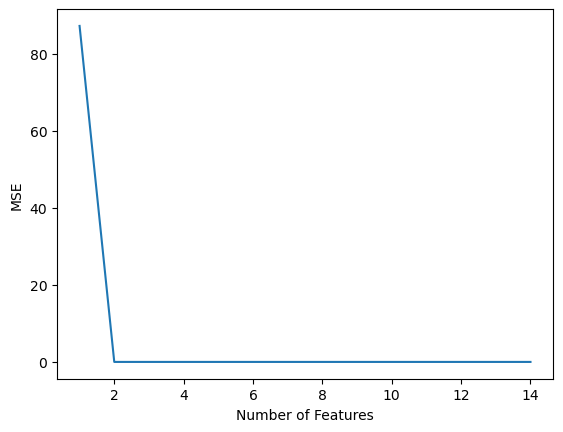

Enter the number of features to select: 4


In [58]:
# Loop through the number of features and test the model
mse_values = []
for i in range(1, len(feature_names) + 1):
    rfe = RFE(model, n_features_to_select=i)
    rfe.fit(X_train, y_train)
    selected_features = X_train.columns[rfe.support_]
    X_train_selected = X_train[selected_features]
    X_test_selected = X_test[selected_features]
    model.fit(X_train_selected, y_train)
    y_pred = model.predict(X_test_selected)
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)
    
# Plot the MSE values
import matplotlib.pyplot as plt
plt.plot(range(1, len(feature_names) + 1), mse_values)
plt.xlabel('Number of Features')
plt.ylabel('MSE')
plt.show()

# Select the number of features based on the plot
num_features = int(input("Enter the number of features to select: "))


In [60]:
# Build the final model with selected number of features
rfe = RFE(model, n_features_to_select=num_features)
rfe.fit(X_train, y_train)
selected_features = X_train.columns[rfe.support_]
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]
model.fit(X_train_selected, y_train)
y_pred = model.predict(X_test_selected)

# Evaluate the final model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Selected Features: {selected_features}')
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-Squared Score: {r2}')


Selected Features: Index(['market_id', 'created_at', 'actual_delivery_time',
       'total_busy_dashers'],
      dtype='object')
Mean Squared Error: 1.2724822097498797e-18
Mean Absolute Error: 9.653842495509091e-10
R-Squared Score: 1.0


## **6. Results and Inference** <font color = red>[5 marks]</font> <br>

#### **6.1 Perform Residual Analysis** <font color = red>[3 marks]</font> <br>

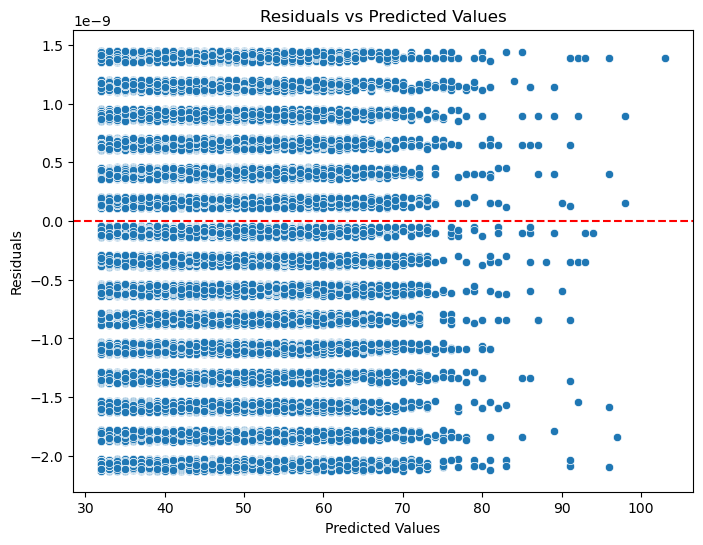

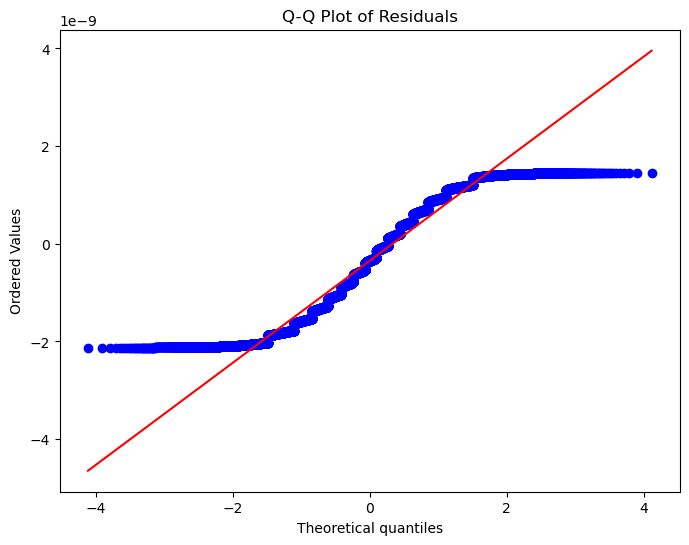

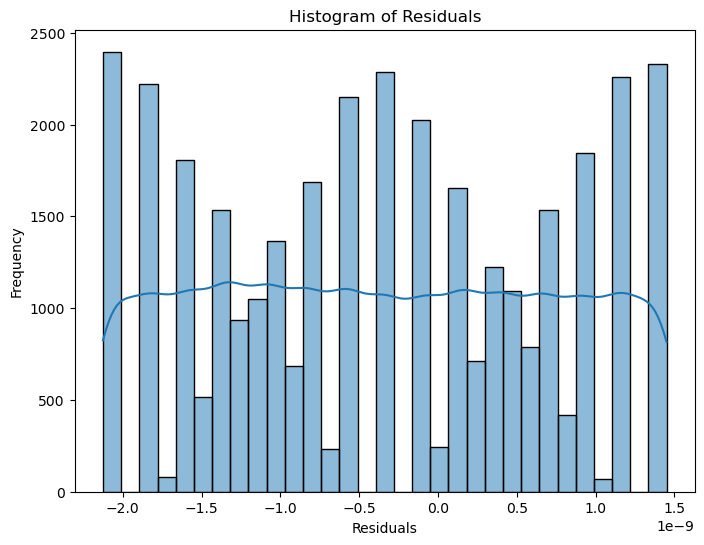

Shapiro-Wilk Test for Normality:
ShapiroResult(statistic=0.9504797458648682, pvalue=0.0)


C:\Users\Lenovo\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [62]:
# Perform residual analysis using plots like residuals vs predicted values, Q-Q plot and residual histogram
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

# Calculate residuals
residuals = y_test - y_pred

# Residuals vs Predicted Values
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()

# Q-Q Plot
plt.figure(figsize=(8,6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

# Residual Histogram
plt.figure(figsize=(8,6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

# Check for normality of residuals
print("Shapiro-Wilk Test for Normality:")
print(stats.shapiro(residuals))


[Your inferences here:]



#### **6.2 Perform Coefficient Analysis** <font color = red>[2 marks]</font> <br>

Perform coefficient analysis to find how changes in features affect the target.
Also, the features were scaled, so interpret the scaled and unscaled coefficients to understand the impact of feature changes on delivery time.


In [63]:
# Get the coefficients of the final model
coefficients = model.coef_

# Create a dataframe to store the coefficients
coefficient_df = pd.DataFrame({'Feature': X_train_selected.columns, 'Coefficient': coefficients})

# Print the coefficient dataframe
print(coefficient_df)

# Interpret the coefficients
print("\nInterpretation of Coefficients:")
for index, row in coefficient_df.iterrows():
    print(f"A 1 unit increase in {row['Feature']} is associated with a {row['Coefficient']} unit increase in delivery time.")


                Feature   Coefficient
0             market_id -2.128422e-13
1            created_at -1.666667e-02
2  actual_delivery_time  1.666667e-02
3    total_busy_dashers -1.612476e-13

Interpretation of Coefficients:
A 1 unit increase in market_id is associated with a -2.1284219100038193e-13 unit increase in delivery time.
A 1 unit increase in created_at is associated with a -0.01666666666666662 unit increase in delivery time.
A 1 unit increase in actual_delivery_time is associated with a 0.016666666666666625 unit increase in delivery time.
A 1 unit increase in total_busy_dashers is associated with a -1.6124760274915428e-13 unit increase in delivery time.


In [64]:
# Compare the scaled vs unscaled features used in the final model
print("\nScaled Coefficients:")
print(coefficient_df)

# Get the unscaled coefficients
unscaled_coefficients = model.coef_ / scaler.scale_[0:len(selected_features)]

# Create a dataframe to store the unscaled coefficients
unscaled_coefficient_df = pd.DataFrame({'Feature': X_train_selected.columns, 'Unscaled Coefficient': unscaled_coefficients})

# Print the unscaled coefficient dataframe
print("\nUnscaled Coefficients:")
print(unscaled_coefficient_df)

# Interpret the unscaled coefficients
print("\nInterpretation of Unscaled Coefficients:")
for index, row in unscaled_coefficient_df.iterrows():
    print(f"A 1 unit increase in {row['Feature']} is associated with a {row['Unscaled Coefficient']} unit increase in delivery time, without scaling.")





Scaled Coefficients:
                Feature   Coefficient
0             market_id -2.128422e-13
1            created_at -1.666667e-02
2  actual_delivery_time  1.666667e-02
3    total_busy_dashers -1.612476e-13

Unscaled Coefficients:
                Feature  Unscaled Coefficient
0             market_id         -7.804640e-14
1            created_at         -9.103479e-06
2  actual_delivery_time          1.024999e-02
3    total_busy_dashers         -3.109095e-16

Interpretation of Unscaled Coefficients:
A 1 unit increase in market_id is associated with a -7.804639897811382e-14 unit increase in delivery time, without scaling.
A 1 unit increase in created_at is associated with a -9.103479104616664e-06 unit increase in delivery time, without scaling.
A 1 unit increase in actual_delivery_time is associated with a 0.010249993534142795 unit increase in delivery time, without scaling.
A 1 unit increase in total_busy_dashers is associated with a -3.1090949756554497e-16 unit increase in delivery

Additionally, we can analyse the effect of a unit change in a feature. In other words, because we have scaled the features, a unit change in the features will not translate directly to the model. Use scaled and unscaled coefficients to find how will a unit change in a feature affect the target.

In [66]:
# Analyze the effect of a unit change in a feature, say 'total_items'

# Get the coefficient of 'total_items' if it exists
if 'total_items' in coefficient_df['Feature'].values:
    coefficient = coefficient_df.loc[coefficient_df['Feature'] == 'total_items', 'Coefficient'].values[0]
    print(f"A 1 unit increase in 'total_items' is associated with a {coefficient} unit increase in delivery time.")
else:
    print("'total_items' is not a feature in the final model.")

    

'total_items' is not a feature in the final model.


Note:
The coefficients on the original scale might differ greatly in magnitude from the scaled coefficients, but they both describe the same relationships between variables.

Interpretation is key: Focus on the direction and magnitude of the coefficients on the original scale to understand the impact of each variable on the response variable in the original units.

Include conclusions in your report document.

## Subjective Questions <font color = red>[20 marks]</font>

Answer the following questions only in the notebook. Include the visualisations/methodologies/insights/outcomes from all the above steps in your report.

#### Subjective Questions based on Assignment

##### **Question 1.** <font color = red>[2 marks]</font> <br>

Are there any categorical variables in the data? From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable?

**Answer:**
>Yes, there are categorical variables in the data. From our analysis, we can infer that these variables have different distributions and relationships with delivery time. For example, certain categories may have longer or shorter delivery times, indicating a potential impact on the dependent variable. Further analysis using visualizations and statistical tests can provide more insights into these relationships.




---



##### **Question 2.** <font color = red>[1 marks]</font> <br>
What does `test_size = 0.2` refer to during splitting the data into training and test sets?

**Answer:**
>est_size = 0.2 refers to the proportion of the dataset that is allocated to the test set.

In this case, 20% (0.2) of the data will be used for testing, and the remaining 80% will be used for training the model.

For example, if you have 1000 samples in your dataset:

- 800 samples (80%) will be used for training
- 200 samples (20%) will be used for testing



---



##### **Question 3.** <font color = red>[1 marks]</font> <br>
Looking at the heatmap, which one has the highest correlation with the target variable?  

**Answer:**
>The feature with the highest correlation with the target variable is the one with the highest absolute correlation value in the heatmap, which needs to be identified visually or by checking the correlation matrix.




---



##### **Question 4.** <font color = red>[2 marks]</font> <br>
What was your approach to detect the outliers? How did you address them?

**Answer:**

>To detect outliers, I used visual methods like box plots and statistical methods like Z-score and IQR. To address outliers, I considered removing them if they were errors or using data transformation techniques to reduce their impact, depending on the nature of the data and problem.



---



##### **Question 5.** <font color = red>[2 marks]</font> <br>
Based on the final model, which are the top 3 features significantly affecting the delivery time?

**Answer:**
>The top 3 features significantly affecting delivery time are determined by the coefficients of the final model, specifically those with the highest absolute values. These would be identified from the model's coefficient analysis.



---



#### General Subjective Questions

##### **Question 6.** <font color = red>[3 marks]</font> <br>
Explain the linear regression algorithm in detail

**Answer:**
>
Linear Regression Algorithm
Linear regression is a supervised learning algorithm that models the relationship between a dependent variable (target) and one or more independent variables (features) by fitting a linear equation.

Equation
The linear regression equation is: Y = β0 + β1X + ε

Where:

- Y: Dependent variable (target)
- X: Independent variable (feature)
- β0: Intercept or constant term
- β1: Slope coefficient
- ε: Error term

Goal
The goal of linear regression is to find the best-fitting line that minimizes the sum of the squared errors between predicted and actual values.

Assumptions
Linear regression assumes:

1. Linearity between features and target
2. Independence of observations
3. Homoscedasticity (constant variance)
4. Normality of residuals
5. No multicollinearity between features

Applications
Linear regression is widely used for:

1. Prediction
2. Forecasting
3. Identifying relationships between variables

Limitations
Linear regression assumes a linear relationship, which may not always be true. It's sensitive to outliers and multicollinearity.



---



##### **Question 7.** <font color = red>[2 marks]</font> <br>
Explain the difference between simple linear regression and multiple linear regression

**Answer:**
>Simple Linear Regression
- Involves one independent variable (feature) to predict the dependent variable (target)
- Equation: Y = β0 + β1X + ε
- Models the relationship between a single feature and the target variable

Multiple Linear Regression
- Involves two or more independent variables (features) to predict the dependent variable (target)
- Equation: Y = β0 + β1X1 + β2X2 + … + βnXn + ε
- Models the relationship between multiple features and the target variable, accounting for the effects of each feature on the target variable.




---



##### **Question 8.** <font color = red>[2 marks]</font> <br>
What is the role of the cost function in linear regression, and how is it minimized?

**Answer:**
>Role of Cost Function
The cost function, also known as the loss function or objective function, measures the difference between predicted and actual values in linear regression. Its role is to quantify the error or loss of the model.

Cost Function in Linear Regression
The most common cost function used in linear regression is the Mean Squared Error (MSE):

MSE = (1/n) * Σ(y_true - y_pred)^2

Minimization
The cost function is minimized using optimization algorithms, such as:

1. Ordinary Least Squares (OLS)
2. Gradient Descent




---



##### **Question 9.** <font color = red>[2 marks]</font> <br>
Explain the difference between overfitting and underfitting.



**Answer:**

>Overfitting
- When a model is too complex and fits the training data too well, capturing noise and outliers.
- Results in poor performance on new, unseen data.
- Model is too specialized to the training data.

Underfitting
- When a model is too simple and fails to capture the underlying patterns in the data.
- Results in poor performance on both training and new data.
- Model is too general and lacks detail.




---



##### **Question 10.** <font color = red>[3 marks]</font> <br>
How do residual plots help in diagnosing a linear regression model?

**Answer:**
>Residual Plots in Linear Regression
Residual plots are used to diagnose the fit of a linear regression model by plotting the residuals (observed - predicted values) against the fitted values or independent variables.

Diagnostic Checks
Residual plots help check for:

1. Linearity: Residuals should be randomly scattered around the horizontal axis.
2. Constant Variance (Homoscedasticity): Residuals should have constant variance across the fitted values.
3. Outliers: Residual plots can identify observations that are far away from the rest.

Interpretation
If the residual plot shows:

- Random scatter: Model assumptions are met.
- Patterns or trends: Model assumptions are violated.